In [4]:
import pandas as pd

# Load dataset (replace 'your_file.csv' with the actual file name)
df = pd.read_csv('/content/train.csv')

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Replace missing values with the most frequent category (mode)
for col in categorical_cols:
    mode = df[col].mode()[0]  # Get the most common value
    df[col].fillna(mode, inplace=True)  # Fill missing values
df.head()

ModuleNotFoundError: No module named 'pandas'

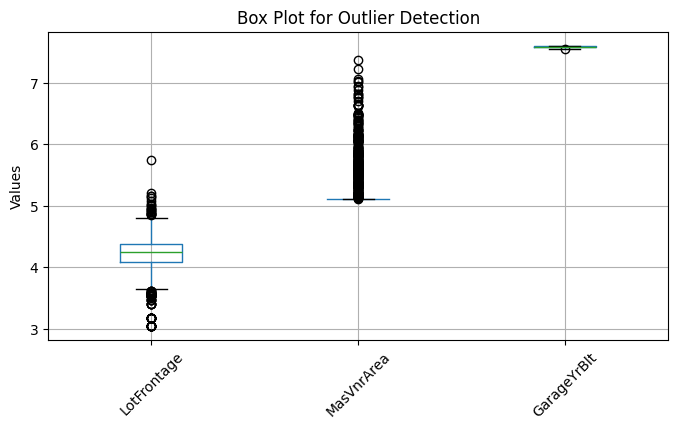

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

features = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

# Plot box plots
df[features]=np.log(df[features])
df[features].boxplot(figsize=(8, 4))

plt.title('Box Plot for Outlier Detection')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [73]:
# import pandas as pd
# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
for col in numerical_columns:
    median = df[col].median()
    df[col].fillna(median, inplace=True)  # Replace nulls with median

In [74]:
# Get columns that contain 'Yr' or 'Year'
year_columns = [feature for feature in numerical_columns if 'Yr' in feature or 'Year' in feature]

# Convert year values into age-related features
for col in year_columns:
    df[col] = df['YrSold'] - df[col]

In [76]:
# import pandas as pd

# Get numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Identify columns containing zeros
numerical_0s = df.loc[:, (df == 0).any()].select_dtypes(include=['number']).columns

# Remove columns that contain zeros from consideration
numerical_columns = numerical_columns.difference(numerical_0s)

# Calculate skewness for the remaining numerical columns
skewness = df[numerical_columns].skew()

# Set threshold for skewness (e.g., absolute value > 1 indicates high skewness)
skewed_columns = skewness[abs(skewness) > 1]

# Display skewed columns
print("Skewed Columns:")
print(skewed_columns)

Skewed Columns:
GrLivArea       1.186075
LotArea        12.348242
LotFrontage     1.806476
MSSubClass      1.404451
SalePrice       1.963159
dtype: float64


In [64]:
import numpy as np

# The list of highly skewed features identified earlier
skew_features = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

# Apply log transformation to each skewed feature
for col in skew_features:
    df[col] = np.log(df[col])

In [77]:
# Select categorical variables
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Apply target encoding
for col in categorical_columns:
    # Compute mean SalePrice for each category
    labels_ordered = df.groupby([col])['SalePrice'].mean().sort_values().index

    # Assign numerical values based on target variable mean
    labels_ordered = {x: i for i, x in enumerate(labels_ordered, 0)}

    # Map encoded values back to the dataframe
    df[col] = df[col].map(labels_ordered)
# df.head()